In [1]:
pip install libomp

ERROR: Could not find a version that satisfies the requirement libomp (from versions: none)
ERROR: No matching distribution found for libomp
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import pycaret

In [13]:
df = pd.read_csv("CLEAN_chm_jail_data.csv")
df[['age_at_arrest', 'age_at_release', 'occupation_no', 'school_no', 'r_count', 'prisoner_type_no']].corr()

,age_at_arrest,age_at_release,occupation_no,school_no,r_count,prisoner_type_no
age_at_arrest,1.000000,0.999865,0.176182,-0.038550,-0.040794,0.035025
age_at_release,0.999865,1.000000,0.175659,-0.038514,-0.040451,0.036022
occupation_no,0.176182,0.175659,1.000000,-0.003866,-0.133611,-0.027338
school_no,-0.038550,-0.038514,-0.003866,1.000000,-0.008835,-0.001849
r_count,-0.040794,-0.040451,-0.133611,-0.008835,1.000000,0.042630
prisoner_type_no,0.035025,0.036022,-0.027338,-0.001849,0.042630,1.000000


In [7]:
from pycaret.datasets import get_data
data = get_data("CLEAN_chm_jail_data")

,booking_date,jacket_number,age_at_arrest,age_at_release,hours,marital_status,employment_status,city,race,sex,...,city_no,race_no,sex_no,STATE_no,citizenship_no,occupation_no,school_no,prisoner_type_no,r,r_count
0,1/1/2012,22914,51.0,51.0,1,Divorced,Employed - Full Time,CHAMPAIGN,Black,Male,...,0,0,0,0,0,4,0,0,True,1
1,1/1/2012,1024225,32.0,32.0,32,Single,Employed - Full Time,CHAMPAIGN,Black,Male,...,0,0,0,0,0,0,0,2,True,4
2,1/1/2012,1024226,20.0,20.0,12,Single,Employed - Part Time,CHAMPAIGN,Black,Male,...,0,0,0,0,0,8,0,0,False,0
3,1/1/2012,1024227,20.0,20.0,10,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,0,0,0,0,2,0,2,False,0
4,1/1/2012,1024228,17.0,17.0,10,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,0,0,0,0,0,0,3,True,6


Text(0, 0.5, 'Number of Repeat Offenses')

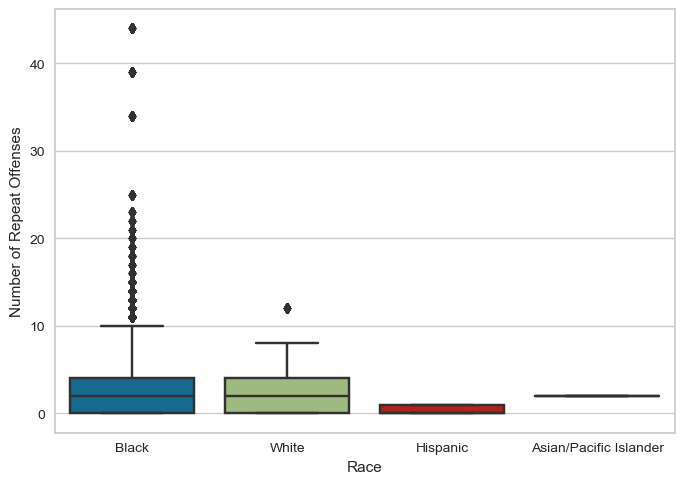

In [32]:
sns.boxplot(x='race', y='r_count', data=df)
plt.xlabel("Race")
plt.ylabel("Number of Repeat Offenses")

Text(0, 0.5, 'Number of Repeat Offenses')

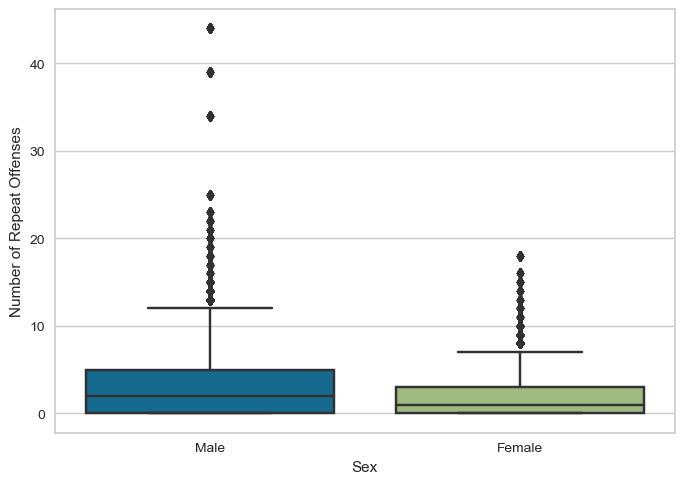

In [31]:
sns.boxplot(x='sex', y='r_count', data=df)
plt.xlabel("Sex")
plt.ylabel("Number of Repeat Offenses")

Text(0, 0.5, 'Number of Repeat Offenses')

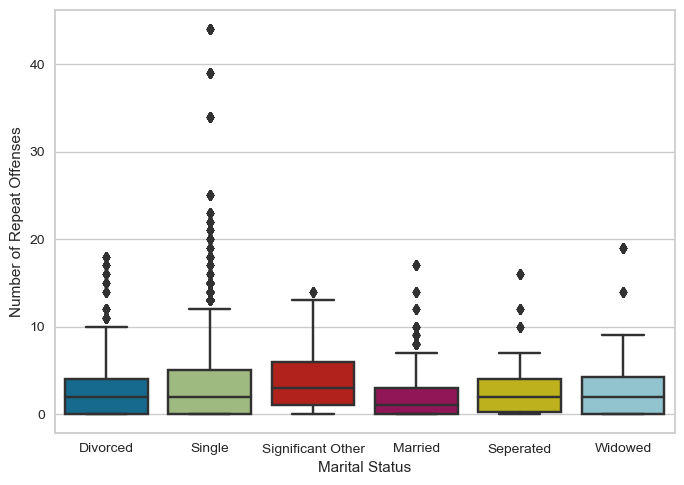

In [30]:
sns.boxplot(x='marital_status', y='r_count', data=df)
plt.xlabel("Marital Status")
plt.ylabel("Number of Repeat Offenses")

Text(0, 0.5, 'Number of Repeat Offenses')

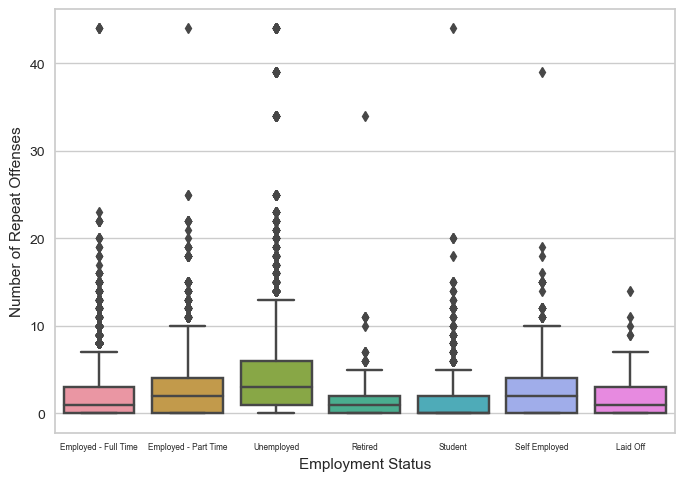

In [29]:
sns.boxplot(x='employment_status', y='r_count', data=df)
xticklabels = plt.xticks()[1]


plt.setp(xticklabels, fontsize=6) 
plt.xlabel("Employment Status")
plt.ylabel("Number of Repeat Offenses")

Text(0, 0.5, 'Number of Repeat Offenses')

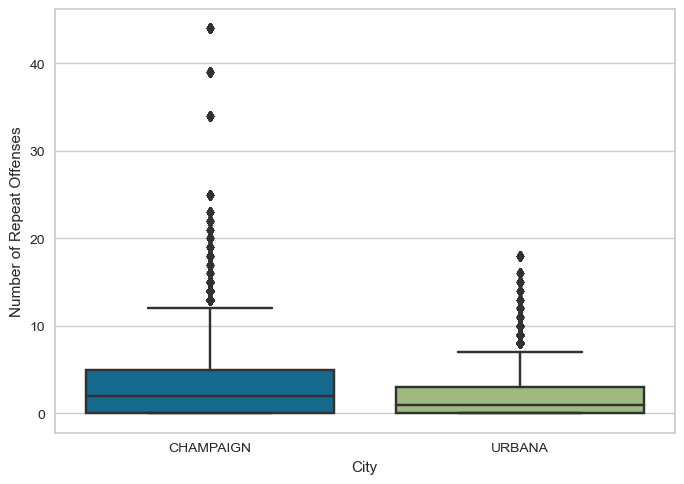

In [33]:
sns.boxplot(x='city', y='r_count', data=df)
plt.xlabel("City")
plt.ylabel("Number of Repeat Offenses")

In [16]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'r_count', session_id = 123)

OSError: dlopen(/Users/samuelhaskel/anaconda3/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <C3EB28DD-60B6-3334-AFA2-72BBBF9DBAEF> /Users/samuelhaskel/anaconda3/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)